# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units='metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | shimoda
Processing Record 3 of Set 1 | lehliu-gara
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | piti village
Processing Record 7 of Set 1 | tevriz
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | bargara
City not found. Skipping...
Processing Record 10 of Set 1 | la'ie
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | boyolangu
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | haiku-pauwela
Processing Record 15 of Set 1 | dongola
Processing Record 16 of Set 1 | hotan
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | uturoa
Processing Record 19 of Set 1 | valdivia
Processing Record 20 of Set 1 | isangel
Processing Record 21 of Set 1 | okondja
Processing Record 22 of Set 1

Processing Record 41 of Set 4 | plastun
Processing Record 42 of Set 4 | sanya
Processing Record 43 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 44 of Set 4 | alegria
Processing Record 45 of Set 4 | elko
Processing Record 46 of Set 4 | afaahiti
Processing Record 47 of Set 4 | palmer
Processing Record 48 of Set 4 | yashkino
Processing Record 49 of Set 4 | launceston
Processing Record 0 of Set 5 | minas de marcona
Processing Record 1 of Set 5 | bati
Processing Record 2 of Set 5 | hushitai
Processing Record 3 of Set 5 | keflavik
Processing Record 4 of Set 5 | pervomayskiy
Processing Record 5 of Set 5 | sinabang
Processing Record 6 of Set 5 | pursat
Processing Record 7 of Set 5 | mahalapye
Processing Record 8 of Set 5 | kamyshlov
Processing Record 9 of Set 5 | nema
Processing Record 10 of Set 5 | chibougamau
Processing Record 11 of Set 5 | port saint john's
Processing Record 12 of Set 5 | kidal
Processing Record 13 of Set 5 | carnarvon
Processing Record 14 of S

Processing Record 31 of Set 8 | malabar
Processing Record 32 of Set 8 | pikeville
Processing Record 33 of Set 8 | zuwarah
Processing Record 34 of Set 8 | champerico
Processing Record 35 of Set 8 | kharagpur
Processing Record 36 of Set 8 | khandud
Processing Record 37 of Set 8 | mersa matruh
Processing Record 38 of Set 8 | forquilhinha
Processing Record 39 of Set 8 | vecumnieki
Processing Record 40 of Set 8 | anar darah
Processing Record 41 of Set 8 | fale old settlement
Processing Record 42 of Set 8 | howard springs
Processing Record 43 of Set 8 | strakonice
Processing Record 44 of Set 8 | amble
Processing Record 45 of Set 8 | crane
Processing Record 46 of Set 8 | arkhangel'sk
Processing Record 47 of Set 8 | puerto baquerizo moreno
Processing Record 48 of Set 8 | suva
Processing Record 49 of Set 8 | saipan
Processing Record 0 of Set 9 | salavan
Processing Record 1 of Set 9 | moree
Processing Record 2 of Set 9 | hihifo
City not found. Skipping...
Processing Record 3 of Set 9 | kontcha
P

Processing Record 19 of Set 12 | madinat ash shamal
Processing Record 20 of Set 12 | prince rupert
Processing Record 21 of Set 12 | lulea
Processing Record 22 of Set 12 | sale
Processing Record 23 of Set 12 | lorengau
Processing Record 24 of Set 12 | podoleni
Processing Record 25 of Set 12 | rongelap
Processing Record 26 of Set 12 | villa alberto andres alvarado aramburo
City not found. Skipping...
Processing Record 27 of Set 12 | tarrafal de sao nicolau
Processing Record 28 of Set 12 | vorozhba
Processing Record 29 of Set 12 | vershino-darasunskiy
Processing Record 30 of Set 12 | ancud
Processing Record 31 of Set 12 | saint-raphael
Processing Record 32 of Set 12 | kuanda
Processing Record 33 of Set 12 | fort mcmurray
Processing Record 34 of Set 12 | kangding
Processing Record 35 of Set 12 | phan rang-thap cham
Processing Record 36 of Set 12 | tibanbang
Processing Record 37 of Set 12 | trail
Processing Record 38 of Set 12 | rasht
Processing Record 39 of Set 12 | bikenibeu village
Proce

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-3.71,100,100,8.75,CA,1706557211
1,shimoda,34.6667,138.9500,3.95,69,3,4.32,JP,1706557211
2,lehliu-gara,44.4333,26.8500,2.01,80,23,4.77,RO,1706557212
3,mount gambier,-37.8333,140.7667,11.25,93,8,2.35,AU,1706557212
4,edinburgh of the seven seas,-37.0676,-12.3116,16.59,71,41,9.34,SH,1706557212


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output/cities.csv", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-3.71,100,100,8.75,CA,1706557211
1,shimoda,34.6667,138.9500,3.95,69,3,4.32,JP,1706557211
2,lehliu-gara,44.4333,26.8500,2.01,80,23,4.77,RO,1706557212
3,mount gambier,-37.8333,140.7667,11.25,93,8,2.35,AU,1706557212
4,edinburgh of the seven seas,-37.0676,-12.3116,16.59,71,41,9.34,SH,1706557212


In [13]:
url="http://api.openweathermap.org/data/2.5/weather?"
units='metric'

# Define an empty list to fetch the weather data for each city
city_data = []
city = 'yellowknife'


query_url = url + "appid=" + weather_api_key + "&units=" + units +"&q=" + city
#     query_url = url + "appid=" + weather_api_key + "&q=" + cities + "&units=" + units
# query_url
city_weather = requests.get(query_url).json()
city_weather

{'coord': {'lon': -114.3525, 'lat': 62.456},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13d'}],
 'base': 'stations',
 'main': {'temp': -3.71,
  'feels_like': -10.71,
  'temp_min': -3.71,
  'temp_max': -3.71,
  'pressure': 995,
  'humidity': 100},
 'visibility': 10000,
 'wind': {'speed': 8.75, 'deg': 150},
 'clouds': {'all': 100},
 'dt': 1706557211,
 'sys': {'type': 1,
  'id': 1007,
  'country': 'CA',
  'sunrise': 1706544898,
  'sunset': 1706570747},
 'timezone': -25200,
 'id': 6185377,
 'name': 'Yellowknife',
 'cod': 200}

In [44]:
# To get the date
city_data_df1=city_data_df.copy()
# city_data_df1
get_date=pd.to_datetime(city_data_df1["Date"],unit='s')
get_date

city_data_df1["ActualDate"] = pd.to_datetime(get_date).dt.date
# city_data_df1["ActualDate"]
# city_data_df1

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

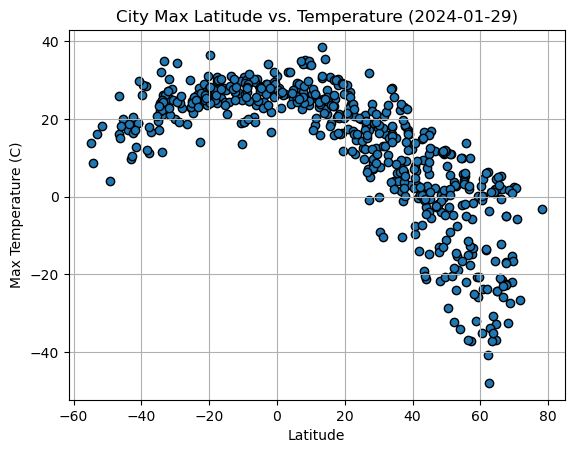

In [45]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,marker='o',edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs. Temperature ("+ str(city_data_df1["ActualDate"][0])+ ")")
plt.grid()

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

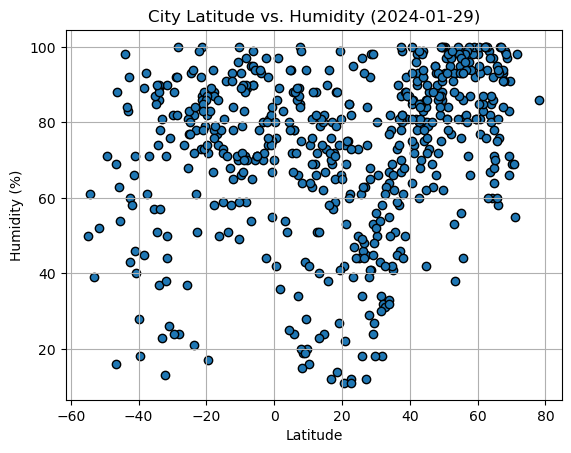

In [46]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,marker='o',edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (" +(str(city_data_df1["ActualDate"][0])+ ")"))
plt.grid()

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

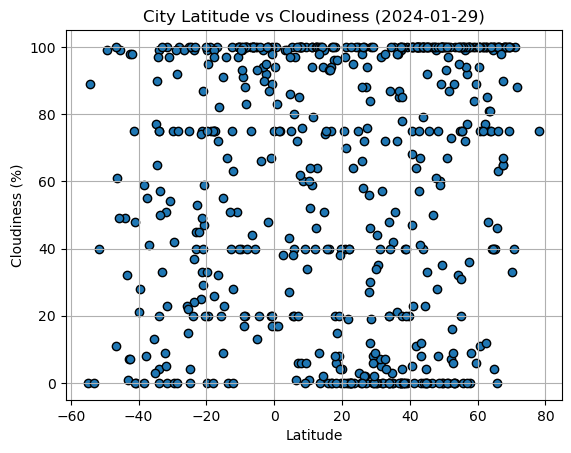

In [47]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,marker='o',edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs Cloudiness ("+ (str(city_data_df1["ActualDate"][0])+ ")"))
plt.grid()

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

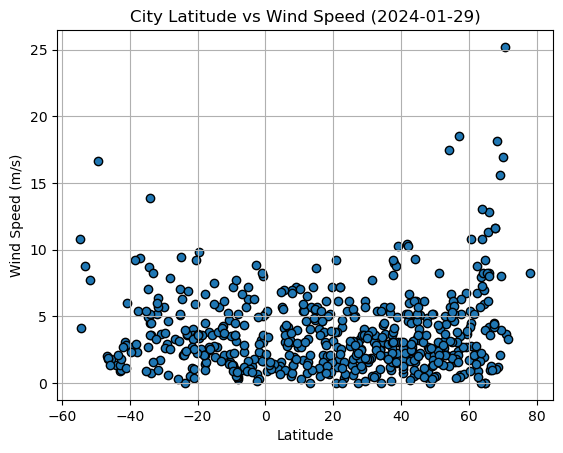

In [48]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,marker='o',edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs Wind Speed ("+ (str(city_data_df1["ActualDate"][0])+ ")"))
plt.grid()

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values,coordinates,ylabels,titles):
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
   regress_values = x_values * slope + intercept
#     linear_reg_plot(x_values,y_values,"Lat vs Temp")
   line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#    print(line_eq)

   # Plot scatter plot
   plt.scatter(x_values,y_values)

# Plot regression line
   plt.plot(x_values,regress_values,"r-")
   
# Label plot
   plt.xlabel('Latitude')
   plt.ylabel(ylabels)
   plt.annotate(line_eq,coordinates,fontsize=15,color="red")
   plt.title(titles)

# Print r square value
   print(f"The r-value is : {rvalue}")
   print(f"R squared: {rvalue**2}")
   
# Show plot
   plt.show()
   
   


In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df['Lat'] >=0)]

# Display sample data
northern_hemi_df.head()
# northern_hemi_df.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-3.71,100,100,8.75,CA,1706557211
1,shimoda,34.6667,138.9500,3.95,69,3,4.32,JP,1706557211
2,lehliu-gara,44.4333,26.8500,2.01,80,23,4.77,RO,1706557212
5,piti village,13.4626,144.6933,25.17,79,0,5.66,GU,1706557212
6,tevriz,57.5090,72.4042,-14.77,98,100,0.61,RU,1706557212


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df['Lat'] <0)]

# Display sample data
southern_hemi_df.head()
# southern_hemi_df.count()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,mount gambier,-37.8333,140.7667,11.25,93,8,2.35,AU,1706557212
4,edinburgh of the seven seas,-37.0676,-12.3116,16.59,71,41,9.34,SH,1706557212
9,puerto natales,-51.7236,-72.4875,18.25,52,40,7.72,CL,1706557213
10,boyolangu,-8.1181,111.8935,24.66,89,100,0.33,ID,1706557213
11,adamstown,-25.0660,-130.1015,24.58,77,100,5.07,PN,1706557213


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.8056403494758057
R squared: 0.6490563727034983


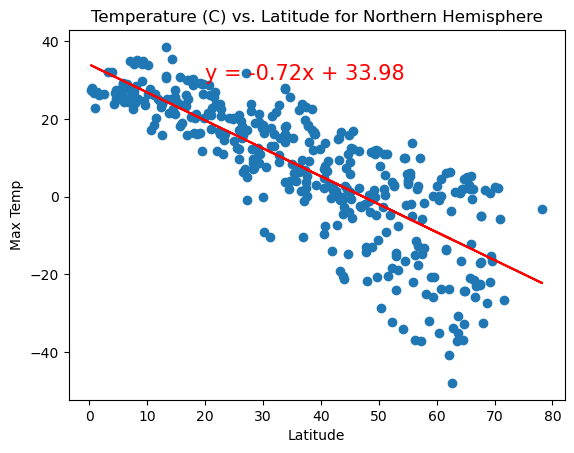

<Figure size 640x480 with 0 Axes>

In [74]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Max Temp']

linear_reg_plot(x_values,y_values,(20,30),'Max Temp','Temperature (C) vs. Latitude for Northern Hemisphere')

The r-value is : 0.5461146730536784
R squared: 0.2982412361245261


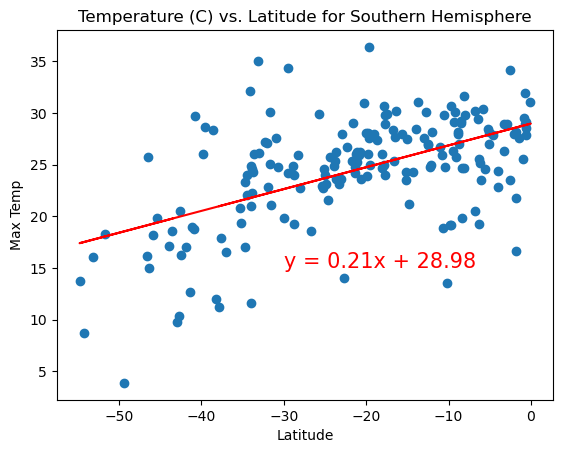

In [65]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Max Temp']

linear_reg_plot(x_values,y_values,(-30,15),'Max Temp','Temperature (C) vs. Latitude for Southern Hemisphere')

**Discussion about the linear relationship:** 

Northern Hemisphere: The linear regression equation has a negative correlation coefficient. A negative r-value of -0.8056403494758057 indicating a strong negative correlation (inverse relationship) between latitude and temperature as we traverse across latitude towards northern hemisphere. (As the latitude increases the temperature decreases in northern hemisphere when traversing away from the equator).

Southern Hemisphere: As we traverse towards the equator the temperature increases, indicated by the positive correlation coefficient from the linear equation. A positive r-value of 0.5461146730536784 indicates a positive correlation between the latitude and temperature. (As the latitude increases the temperature increases).


### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.4189355226360897
R squared: 0.17550697212637362


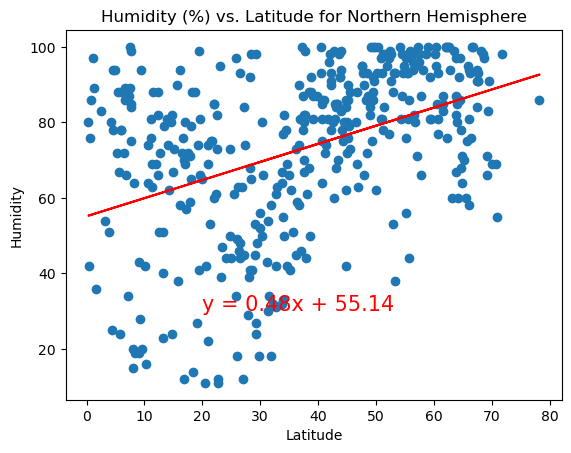

In [67]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Humidity']

linear_reg_plot(x_values,y_values,(20,30),'Humidity','Humidity (%) vs. Latitude for Northern Hemisphere')

The r-value is : 0.3021593755936192
R squared: 0.09130028825912585


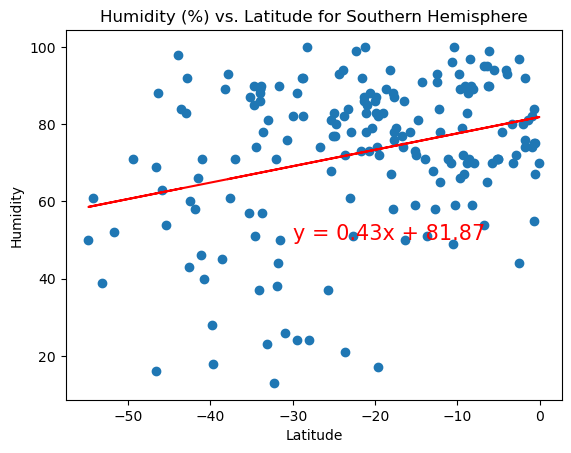

In [66]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Humidity']

linear_reg_plot(x_values,y_values,(-30,50),'Humidity','Humidity (%) vs. Latitude for Southern Hemisphere')

**Discussion about the linear relationship:** 

Northern and Southern hemisphere: When the latitude increases the humidity also increases. This indicates a positive relationship between the two. The r-value of northern hemisphere is 0.4189355226360897 and for southern hemisphere is 0.3021593755936192. Both northern and southern hemisphere is considered to have a moderate positive correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.17515373016874183
R squared: 0.030678829192024422


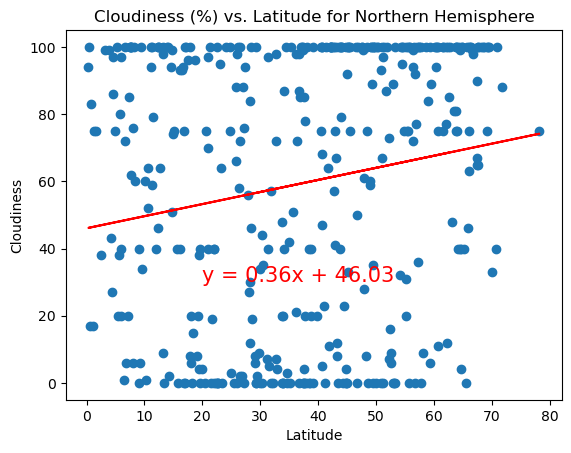

In [68]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Cloudiness']

linear_reg_plot(x_values,y_values,(20,30),'Cloudiness','Cloudiness (%) vs. Latitude for Northern Hemisphere')

The r-value is : 0.31180762939375034
R squared: 0.09722399774815037


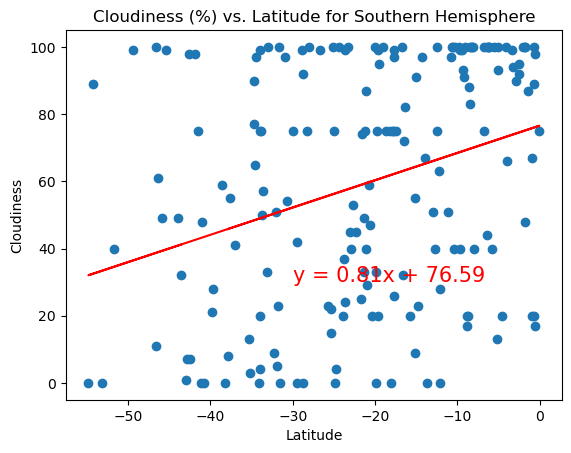

In [69]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Cloudiness']
linear_reg_plot(x_values,y_values,(-30,30),'Cloudiness','Cloudiness (%) vs. Latitude for Southern Hemisphere')

**Discussion about the linear relationship:** 

Northern Hemisphere : As the latitude increases the cloudiness also increases. However, the r-value is 0.17515373016874183 indicates a weak positive correlation between latitude and cloudiness in the northern hemisphere.

Southern Hemisphere : The r-value is 0.31180762939375034. It indicates a moderate positive correlation between latitude and cloudiness in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.2272260348175748
R squared: 0.051631670898917716


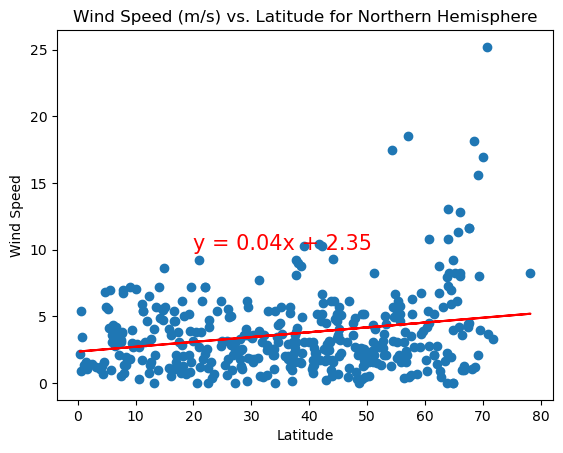

In [72]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Wind Speed']
linear_reg_plot(x_values,y_values,(20,10), 'Wind Speed','Wind Speed (m/s) vs. Latitude for Northern Hemisphere')

The r-value is : -0.18023056513743935
R squared: 0.032483056609760766


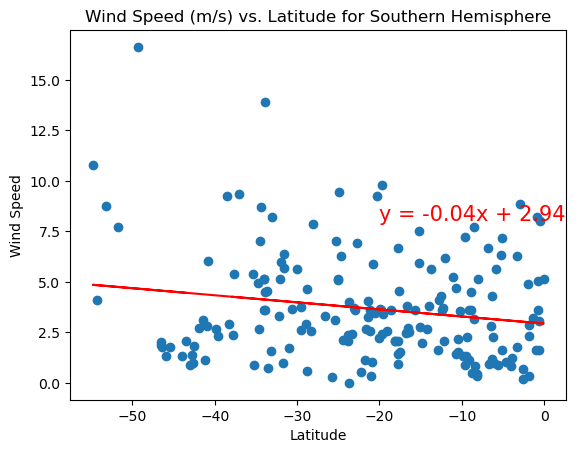

In [73]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Wind Speed']
linear_reg_plot(x_values,y_values,(-20,8),'Wind Speed','Wind Speed (m/s) vs. Latitude for Southern Hemisphere')

**Discussion about the linear relationship:** 

Northern Hemisphere : The r-value is 0.2272260348175748. The r-value indicates a statistical measure of the strength of a linear relationship between two variables. This indicates a weak positive correlation between latitude and wind speed in northern hemisphere.

Southern Hemisphere : The r-value is -0.18023056513743935 indicates a weak negative correlation between latitude and wind speed in the southern hemisphere.